### Regression in keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Generate a database for keras

In [2]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=1000,n_features=10,n_informative=6,noise=10,random_state=42)

In [3]:
X

array([[ 1.12790899,  0.49470565,  0.0443588 , ...,  0.38343503,
         1.00592451,  0.15449367],
       [-0.49665105,  1.26961326, -1.2774366 , ..., -1.24515058,
        -0.14358159,  0.92304483],
       [ 0.6686548 , -0.73095628, -0.53533509, ...,  0.75792185,
         1.84860883,  0.09806754],
       ...,
       [-0.83418485,  0.67229341, -2.4036686 , ..., -1.50047655,
         1.6722659 , -2.26605209],
       [ 0.8896308 ,  1.44697788, -0.18687164, ...,  0.19655478,
        -1.48556037,  0.08228399],
       [ 1.60734558,  0.86047349,  0.3074067 , ..., -0.58307744,
         0.28257995,  0.49097495]])

In [4]:
Y

array([-2.62582272e+01,  4.07633307e+01,  3.51849040e+01,  9.18539795e+00,
       -1.17149738e+02,  1.16687987e+02, -5.76432966e+01, -1.87389866e+02,
       -1.01386154e+02,  4.86377872e+01,  1.58474643e+01,  4.74463777e+01,
       -9.20044905e+01, -1.03449820e+02, -9.79708735e+01, -1.07152945e+02,
        8.41589920e+01, -1.59284032e+01, -8.75763995e+01, -9.35469442e+01,
        1.17947308e+02,  8.27442365e+01,  1.37827792e+02,  8.12022225e+01,
       -6.30615548e+01,  1.82714823e+02, -1.86302211e+02, -9.00608006e+01,
        3.32200126e+01, -5.43175812e+00, -1.30630067e+02,  1.01759737e+01,
        1.47207281e+01,  1.16321893e+01, -9.26385260e+01, -4.68970962e+01,
       -3.75960961e+01, -2.66787086e+01,  2.09257954e-01,  6.09708208e+01,
        4.76958379e+01,  6.65711234e-02, -6.60998640e+01,  8.67880911e+01,
        1.33424638e+00,  2.94622941e+01, -4.25075516e+01, -9.19587342e+01,
       -2.06770678e+01,  9.47502943e+01,  7.58011700e+01, -3.40262501e+01,
        6.13882732e+01,  

In [5]:
import pandas as pd
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9
0,1.127909,0.494706,0.044359,-1.745707,-0.336553,-0.409308,-1.127496,0.383435,1.005925,0.154494
1,-0.496651,1.269613,-1.277437,1.156582,0.406094,1.357620,0.418515,-1.245151,-0.143582,0.923045
2,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
3,2.121631,0.729773,0.314445,-0.358958,-2.025040,0.043031,-2.065303,-0.931002,0.686858,-0.283152
4,-0.123729,-0.856498,-0.993863,0.420192,-1.184031,-1.264498,-0.382817,0.097670,-1.793106,-0.397680
...,...,...,...,...,...,...,...,...,...,...
995,-0.251539,1.194109,-1.725807,-0.677565,1.422370,-0.464404,0.783391,-0.981166,0.462061,-0.597510
996,0.298798,0.058370,-0.025494,-0.217159,1.898735,-0.343206,0.973726,-0.603859,-2.085792,-0.773456
997,-0.834185,0.672293,-2.403669,1.392456,-0.350778,-1.478777,-0.737380,-1.500477,1.672266,-2.266052
998,0.889631,1.446978,-0.186872,-0.439731,1.065480,1.031845,0.267050,0.196555,-1.485560,0.082284


In [6]:
cols = [f'x{i+1}' for i in range (10)]
cols

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

In [7]:
X.columns = cols

In [8]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.127909,0.494706,0.044359,-1.745707,-0.336553,-0.409308,-1.127496,0.383435,1.005925,0.154494
1,-0.496651,1.269613,-1.277437,1.156582,0.406094,1.357620,0.418515,-1.245151,-0.143582,0.923045
2,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
3,2.121631,0.729773,0.314445,-0.358958,-2.025040,0.043031,-2.065303,-0.931002,0.686858,-0.283152
4,-0.123729,-0.856498,-0.993863,0.420192,-1.184031,-1.264498,-0.382817,0.097670,-1.793106,-0.397680


In [9]:
Y = pd.DataFrame(Y)
Y.columns = ['Y']

In [10]:
Y

,Y
0,-26.258227
1,40.763331
2,35.184904
3,9.185398
4,-117.149738
...,...
995,-96.717837
996,-50.240682
997,-150.558474
998,55.935076


#### Preprocessing on X dataframe  - scikitlearn pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [12]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 1.08924995,  0.5262603 ,  0.03340657, ...,  0.43392418,
         0.99871794,  0.18005449],
       [-0.4873097 ,  1.31467041, -1.28190467, ..., -1.22297029,
        -0.11030302,  0.95923927],
       [ 0.64356521, -0.72075836, -0.54344359, ...,  0.81492051,
         1.81172327,  0.12284766],
       ...,
       [-0.81487048,  0.70694246, -2.40261186, ..., -1.48273446,
         1.64159107, -2.27398178],
       [ 0.85801209,  1.49512555, -0.19668956, ...,  0.24379548,
        -1.40501786,  0.10684572],
       [ 1.55452077,  0.89840152,  0.29516407, ..., -0.54938868,
         0.30084928,  0.52119131]])

In [14]:
cols = num_pipe.get_feature_names_out()
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'],
      dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.089250,0.526260,0.033407,-1.749812,-0.396542,-0.417858,-1.091289,0.433924,0.998718,0.180054
1,-0.487310,1.314670,-1.281905,1.108072,0.389484,1.327879,0.408652,-1.222970,-0.110303,0.959239
2,0.643565,-0.720758,-0.543444,0.322156,1.331236,0.663828,-0.167724,0.814921,1.811723,0.122848
3,2.053611,0.765424,0.302167,-0.384280,-2.183658,0.029057,-2.001149,-0.903361,0.690889,-0.263646
4,-0.125406,-0.848488,-0.999722,0.382949,-1.293523,-1.262791,-0.368801,0.143192,-1.701732,-0.379759


In [16]:
X_pre.mean()

x1    -5.084821e-17
x2     2.153833e-17
x3    -5.939693e-18
x4    -3.552714e-18
x5     1.110223e-17
x6    -1.587619e-17
x7    -2.137179e-18
x8     9.048318e-17
x9    -8.248957e-17
x10   -4.218847e-18
dtype: float64

In [17]:
X_pre.std()

x1     1.0005
x2     1.0005
x3     1.0005
x4     1.0005
x5     1.0005
x6     1.0005
x7     1.0005
x8     1.0005
x9     1.0005
x10    1.0005
dtype: float64

#### Train test Split

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=20)

In [19]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
504,1.399210,0.376552,-0.405981,-1.116219,-1.151299,0.337945,0.493764,0.132029,0.213052,0.599387
839,0.617990,1.378705,-0.226196,-0.955685,1.025074,-0.611110,0.524006,0.988903,0.508478,-1.694274
141,0.915446,0.563214,-2.622675,2.479196,-0.190123,1.153939,0.847408,0.195289,2.289333,0.155922
825,-0.269825,0.253569,-1.783155,-2.227156,0.489027,-0.559915,1.141083,-0.527495,0.699577,-0.321888
470,0.052802,-1.820628,-2.384148,-0.587424,0.047424,-3.114332,-1.105304,-0.923392,-0.103943,-1.624183


In [20]:
ytrain.head()

,Y
504,0.132206
839,-21.683193
141,20.392788
825,-123.017452
470,-293.814428


In [21]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
890,-2.062779,0.112441,1.243930,0.576415,-0.369431,-0.536112,-0.415990,-0.404104,-1.009628,-0.722825
694,-1.300510,0.107210,0.573647,-0.233295,0.419553,1.713713,-0.715118,-0.697005,1.031653,-0.367586
798,0.718648,0.819736,0.316297,-0.595854,-2.213767,1.378268,0.653875,-0.534941,-0.093096,-0.612799
147,-0.100767,0.128951,0.744471,0.246076,-1.208383,-0.758380,-1.639899,-0.019857,-0.242568,-0.978846
858,-0.149901,1.640476,0.898554,-1.552894,1.860960,1.369351,-1.322515,0.627874,-1.266637,0.533164


In [22]:
ytest.head()

,Y
890,5.731177
694,130.217412
798,89.857553
147,-22.800233
858,121.139410


In [23]:
xtrain.shape

(800, 10)

In [24]:
xtest.shape

(200, 10)

#### Create a keras model

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
xtrain.shape

(800, 10)

In [27]:
# initialise the neaural network model
nn = Sequential()

# Input + hidden layer 1
nn.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))

# hidden layer 2
nn.add(Dense(32,activation='relu'))

# output layer
nn.add(Dense(1,activation='linear'))

#### Compile the model

In [28]:
nn.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [29]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Fit the neural network

In [30]:
hist = nn.fit(xtrain,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100


20/20 [==============================] - 6s 67ms/step - loss: 4722.2388 - mae: 55.0656 - val_loss: 5051.9399 - val_mae: 57.9056
Epoch 2/100
20/20 [==============================] - 0s 18ms/step - loss: 4662.9512 - mae: 54.6852 - val_loss: 4971.6436 - val_mae: 57.4325
Epoch 3/100
20/20 [==============================] - 0s 15ms/step - loss: 4562.2217 - mae: 54.0555 - val_loss: 4841.6689 - val_mae: 56.6417
Epoch 4/100
20/20 [==============================] - 0s 16ms/step - loss: 4404.0278 - mae: 52.9890 - val_loss: 4636.0122 - val_mae: 55.3432
Epoch 5/100
20/20 [==============================] - 0s 16ms/step - loss: 4164.4990 - mae: 51.3962 - val_loss: 4336.1001 - val_mae: 53.3851
Epoch 6/100
20/20 [==============================] - 0s 17ms/step - loss: 3827.8228 - mae: 49.0106 - val_loss: 3933.2407 - val_mae: 50.5972
Epoch 7/100
20/20 [==============================] - 0s 15ms/step - loss: 3389.4453 - mae: 45.7017 - val_loss: 3423.3926 - val_mae: 46.8255
Epoch 8/100
20/20 

In [31]:
hist.history['loss']

[4722.23876953125,
 4662.951171875,
 4562.2216796875,
 4404.02783203125,
 4164.4990234375,
 3827.82275390625,
 3389.4453125,
 2864.81201171875,
 2292.441650390625,
 1719.0679931640625,
 1228.8912353515625,
 827.3653564453125,
 549.8417358398438,
 368.0006408691406,
 270.4082336425781,
 217.0920867919922,
 187.10903930664062,
 163.26901245117188,
 148.7227783203125,
 138.0472869873047,
 129.91261291503906,
 124.6387710571289,
 121.57637023925781,
 117.83770751953125,
 115.88072204589844,
 113.27081298828125,
 111.14497375488281,
 109.58045959472656,
 108.6875991821289,
 108.27156829833984,
 106.28660583496094,
 105.60713958740234,
 105.0510482788086,
 104.4308853149414,
 103.64195251464844,
 102.6624984741211,
 101.47917175292969,
 100.454833984375,
 100.63002014160156,
 99.81814575195312,
 99.3082504272461,
 97.92034912109375,
 98.12167358398438,
 96.50164031982422,
 95.72570037841797,
 95.49583435058594,
 94.92987823486328,
 95.65873718261719,
 94.0872573852539,
 93.35400390625,
 92.3

In [32]:
hist.history['val_loss']

[5051.93994140625,
 4971.6435546875,
 4841.6689453125,
 4636.01220703125,
 4336.10009765625,
 3933.24072265625,
 3423.392578125,
 2834.533203125,
 2210.254638671875,
 1628.1297607421875,
 1119.5906982421875,
 736.1017456054688,
 476.7794494628906,
 331.5031433105469,
 250.7366485595703,
 203.74142456054688,
 176.8383331298828,
 163.65675354003906,
 151.95114135742188,
 144.4098358154297,
 140.1250457763672,
 134.70079040527344,
 132.09213256835938,
 129.98947143554688,
 128.39259338378906,
 128.37110900878906,
 124.3737564086914,
 124.74495697021484,
 123.8183364868164,
 123.1111831665039,
 123.19149017333984,
 123.9629135131836,
 120.8500747680664,
 121.76008605957031,
 122.44694519042969,
 119.9013900756836,
 120.85337829589844,
 120.0443115234375,
 120.06092834472656,
 120.8108901977539,
 118.17494201660156,
 119.8605728149414,
 119.0084228515625,
 119.24357604980469,
 119.2105484008789,
 118.46406555175781,
 118.7802505493164,
 117.96513366699219,
 118.80477142333984,
 117.35577392

#### Plot the learning curve

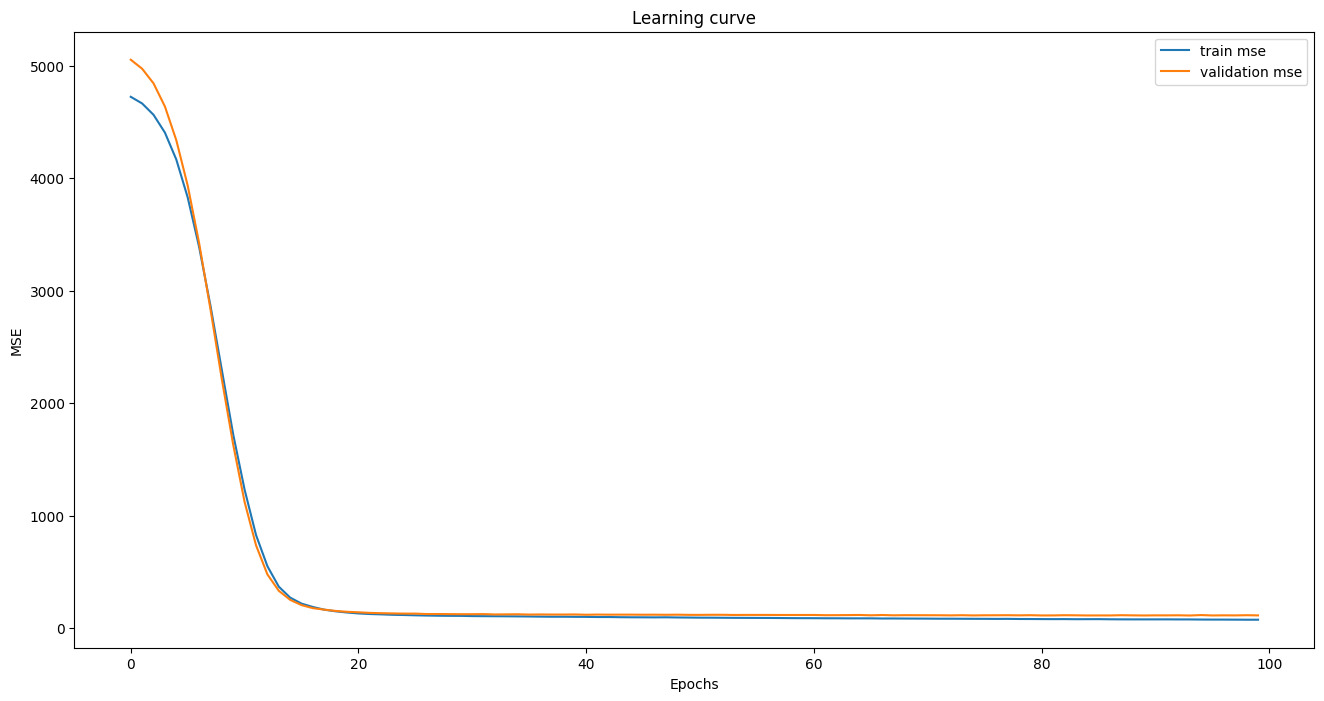

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='train mse')
plt.plot(hist.history['val_loss'],label='validation mse')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning curve')
plt.legend()
plt.show()

#### Evaluate the model

In [34]:
nn.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 5ms/step - loss: 80.5856 - mae: 7.1544


[80.58556365966797, 7.154395580291748]

In [35]:
nn.evaluate(xtest,ytest)

7/7 [==============================] - 1s 7ms/step - loss: 108.5332 - mae: 8.1443


[108.53324890136719, 8.144338607788086]

#### predict train and test data

In [36]:
ypred_tr = nn.predict(xtrain)
ypred_ts = nn.predict(xtest)

7/7 [==============================] - 0s 4ms/step


In [37]:
ypred_tr[0:5]

array([[  -0.35990074],
       [ -31.148676  ],
       [  23.38291   ],
       [-121.9236    ],
       [-274.27673   ]], dtype=float32)

In [38]:
ytrain.head()

,Y
504,0.132206
839,-21.683193
141,20.392788
825,-123.017452
470,-293.814428


In [39]:
ypred_ts[0:5]

array([[ 10.573747],
       [118.988884],
       [ 87.27031 ],
       [-16.950146],
       [100.477325]], dtype=float32)

In [40]:
ytest.head()

,Y
890,5.731177
694,130.217412
798,89.857553
147,-22.800233
858,121.139410


#### R2 score in train and test

In [41]:
from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,ypred_tr)
tr_r2

0.983330230013241

In [42]:
ts_r2 = r2_score(ytest,ypred_ts)
ts_r2

0.9785430435654466

#### Save the model for future reference

In [43]:
nn.save('RegressionModel.keras')

#### load the model back

In [44]:
from keras.models import load_model
model = load_model("RegressionModel.keras")

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
